# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie II : Regréssion Polynomiale**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [3]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Chargement des données à partir du fichier CSV "data.csv" dans un Dataframe pandas nommé DATA et afficher les 5 premières lignes du Dataframe
DATA = pd.read_csv("data.csv")
DATA.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Wheight) et appelez cette variable X.

In [9]:
# Sélectionner les colonnes "Volume" et "Weight" et les stockées dans une nouvelle variable nommée X
X = DATA[['Volume', 'Weight']]
X.head()

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140


### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [10]:
# Sélectionner la colonne "CO2" et la stockée dans une nouvelle variable nommée Y
Y = DATA['CO2']
Y.head()

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [11]:
# Importation de la classe LinearRegression du module linear_model de la bibliothèque scikit-learn
from sklearn.linear_model import LinearRegression
# Création d'une instance de la classe LinearRegression, qui représente le modèle de régression linéaire
model = LinearRegression()

### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [23]:
# Entraînement du modèle de régression linéaire sur les caractéristiques X et les valeurs cibles Y
model.fit(X, Y)

LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [16]:
# Création d'une nouvelle observation pour une voiture avec un volume de 1300 et un poids de 2300
new_car = [[1300, 2300]]
# Prédiction de la valeur de CO2 émise par la nouvelle voiture en utilisant le modèle entraîné
predicted_co2 = model.predict(new_car)
# Affichage de la valeur prédite de CO2 émise par la nouvelle voiture
print(predicted_co2)

[107.2087328]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [20]:
# Récupération des coefficients de régression estimés par le modèle
coefficients = model.coef_
# Affichage des coefficients de régression estimés
print("Coefficients:",coefficients)

Coefficients: [0.00780526 0.00755095]


# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [8]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor

### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [36]:
# Génération de données synthétiques pour la régression
x,y = make_regression(n_samples=100, n_features=1, random_state= 42, noise=5)
# Modification de la variable cible pour introduire une relation non linéaire quadratique
y= x**2
# Création d'un objet PolynomialFeatures pour générer de nouvelles caractéristiques polynomiales
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
# Transformation des caractéristiques initiales en un ensemble de caractéristiques polynomiales
x= poly_feat.fit_transform(x)

### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

(100, 2)

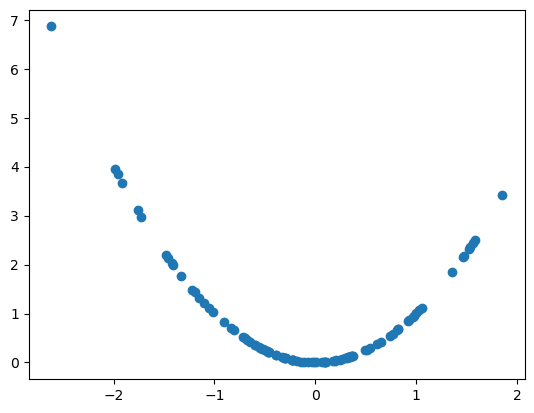

In [39]:
# Tracé d'un nuage de points pour visualiser la relation entre les caractéristiques et la variable cible
plt.scatter(x[:,0],y)
x.shape

### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [32]:
# Création d'un modèle de régression linéaire utilisant la descente de gradient stochastique (SGD)
model=SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.0001)

### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [40]:
# Entraînement du modèle de régression linéaire sur les caractéristiques X et les valeurs cibles Y
model.fit(x,y)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [41]:
# Calcul du coefficient de détermination R² pour évaluer la qualité de l'ajustement du modèle aux données
coe = model.score(x,y)
print(coe)

0.9421818221230078


### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

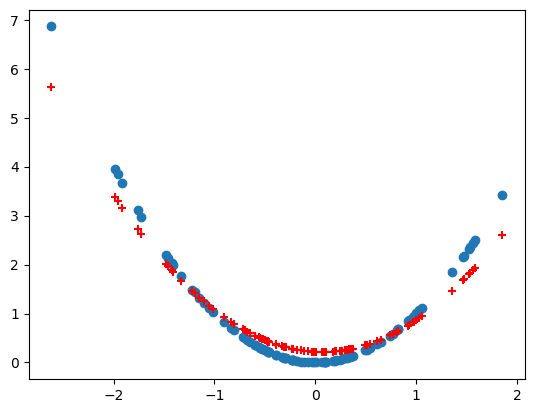

In [46]:
# Tracé d'un nuage de points pour visualiser la relation entre la première caractéristique (x[:, 0]) et la variable cible (y)
plt.scatter(x[:,0],y,marker='o')
# Tracé des prédictions du modèle de régression en rouge
plt.scatter(x[:,0], model.predict(x), c='red' , marker ='+')

### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

0.9917024706082033


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


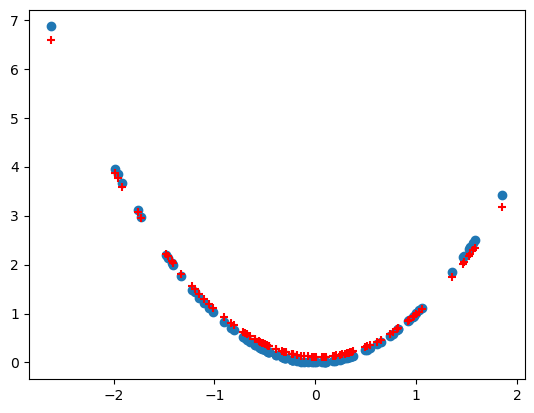

In [8]:
#Création d'un nouveau modèle de régression linéaire utilisant la descente de gradient stochastique (SGD), avec des hyperparamètres modifiés
import matplotlib.pyplot as plt
model=SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.001)
model.fit(x,y)
coe = model.score(x,y)
print(coe)
plt.scatter(x[:,0],y,marker='o')
plt.scatter(x[:,0], model.predict(x), c='red' , marker ='+')